In [1]:
import matplotlib.pyplot as plt
import pydicom

In [2]:
import os

In [3]:
dir_dicom = os.path.join(os.getcwd(), 'rsna-pneumonia-detection-challenge')
os.listdir(dir_dicom)

['stage_2_test_images',
 '.DS_Store',
 'stage_2_detailed_class_info.csv',
 'stage_2_sample_submission.csv',
 'stage_2_train_images',
 'GCP Credits Request Link - RSNA.txt',
 'stage_2_train_labels.csv']

In [4]:
import pandas

In [5]:
df = pandas.read_csv(os.path.join(dir_dicom, 'stage_2_train_labels.csv'))

In [6]:
columns = ['x', 'y', 'width', 'height']
df['bounding_boxs'] = df[columns].to_dict(orient='records')
df = df.drop(columns=columns)

In [7]:
df = df.groupby(["patientId", "Target"])["bounding_boxs"].agg(lambda x: list(x)).reset_index()

In [8]:
df

,patientId,Target,bounding_boxs
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,"[{'x': nan, 'y': nan, 'width': nan, 'height': ..."
1,000924cf-0f8d-42bd-9158-1af53881a557,0,"[{'x': nan, 'y': nan, 'width': nan, 'height': ..."
2,000db696-cf54-4385-b10b-6b16fbb3f985,1,"[{'x': 316.0, 'y': 318.0, 'width': 170.0, 'hei..."
3,000fe35a-2649-43d4-b027-e67796d412e0,1,"[{'x': 570.0, 'y': 282.0, 'width': 269.0, 'hei..."
4,001031d9-f904-4a23-b3e5-2c088acd19c6,1,"[{'x': 66.0, 'y': 160.0, 'width': 373.0, 'heig..."
...,...,...,...
26679,fffb2395-8edd-4954-8a89-ffe2fd329be3,1,"[{'x': 177.0, 'y': 285.0, 'width': 225.0, 'hei..."
26680,fffba05a-1635-4545-9bbd-57ad4cfe8d27,0,"[{'x': nan, 'y': nan, 'width': nan, 'height': ..."
26681,fffc95b5-605b-4226-80ab-62caec682b22,0,"[{'x': nan, 'y': nan, 'width': nan, 'height': ..."
26682,fffcff11-d018-4414-971a-a7cefa327795,0,"[{'x': nan, 'y': nan, 'width': nan, 'height': ..."


In [9]:
import matplotlib.patches as patches
dicoms_training = os.path.join(dir_dicom, 'stage_2_train_images')

In [10]:
def print_dicom_details(_dicom_img):
    print("Storage type.....:", _dicom_img.SOPClassUID)
    pat_name = _dicom_img.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name...:", display_name)
    print("Patient id.......:", _dicom_img.PatientID)
    print("Modality.........:", _dicom_img.Modality)
    print("Study Date.......:", _dicom_img.StudyDate)
    if 'PixelData' in _dicom_img:
        rows = int(_dicom_img.Rows)
        cols = int(_dicom_img.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(_dicom_img.PixelData)))
    if 'PixelSpacing' in _dicom:
        print("Pixel spacing....:", _dicom_img.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", _dicom_img.get('SliceLocation', "(missing)"))

In [11]:
def print_bounding_box(dicom):
    _dicom_img = pydicom.dcmread(os.path.join(dicoms_training, dicom.patientId + '.dcm'))
    print("Patient id.......:", _dicom_img.PatientID)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(_dicom_img.pixel_array, cmap=plt.cm.bone)#cmap stands for color map

    for bb in dicom["bounding_boxs"]:
        x = bb["x"]
        y = bb["y"]
        w = bb["width"]
        h = bb["height"]
        # Create a Rectangle patch
        rect = patches.Rectangle((x,y), w, h, linewidth=1, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()


Patient id.......: 000db696-cf54-4385-b10b-6b16fbb3f985


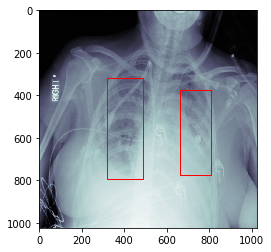

Patient id.......: 000fe35a-2649-43d4-b027-e67796d412e0


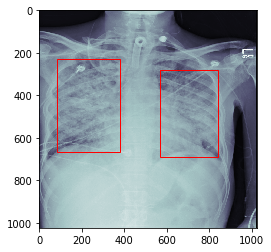

Patient id.......: 001031d9-f904-4a23-b3e5-2c088acd19c6


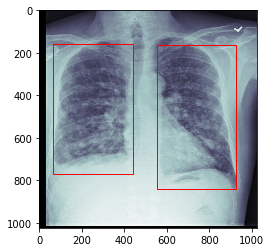

Patient id.......: 0022073f-cec8-42ec-ab5f-bc2314649235


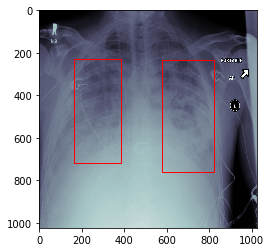

Patient id.......: 002cb550-2e31-42f1-a29d-fbc279977e71


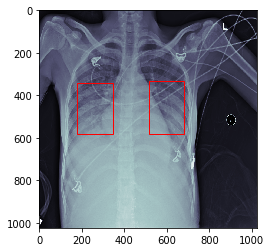

Patient id.......: 00436515-870c-4b36-a041-de91049b9ab4


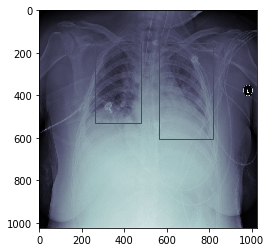

Patient id.......: 00704310-78a8-4b38-8475-49f4573b2dbb


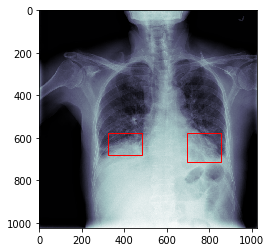

Patient id.......: 0087bd3a-55a7-4045-b111-b018fa52d361


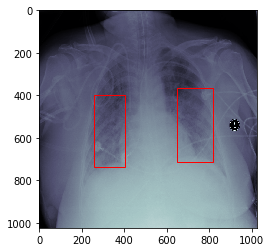

Patient id.......: 00a05408-8291-4231-886e-13763e103161


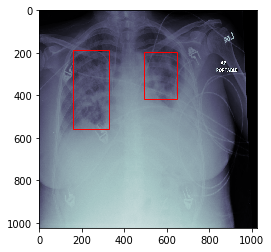

Patient id.......: 00aecb01-a116-45a2-956c-08d2fa55433f


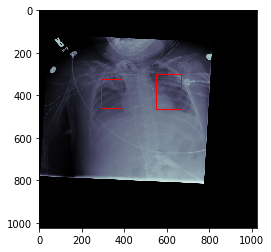

Patient id.......: 00c0b293-48e7-4e16-ac76-9269ba535a62


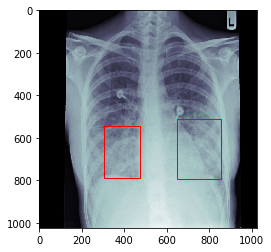

Patient id.......: 00eeb3c9-a892-4fac-a67a-aaa6cc7ffd5c


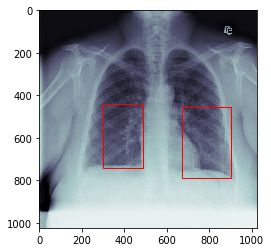

Patient id.......: 00f08de1-517e-4652-a04f-d1dc9ee48593


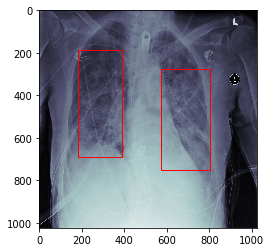

Patient id.......: 010ccb9f-6d46-4380-af11-84f87397a1b8


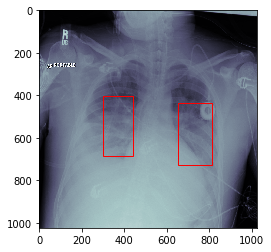

Patient id.......: 012a5620-d082-4bb8-9b3b-e72d8938000c


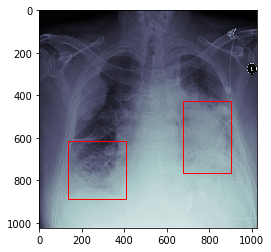

Patient id.......: 013c7df0-d66d-4cb1-b3bc-a70085160311


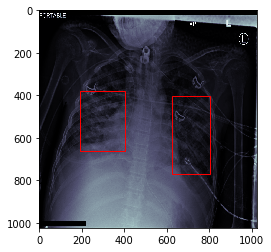

In [23]:
count = 0
for index, dicom in df.iterrows():
    # Skip non-pneumonia patients' xrays
    if len(dicom["bounding_boxs"]) < 2:
        continue
    count += 1
    print_bounding_box(dicom)
    if count > 15:
        break




In [13]:
!ls rsna-pneumonia-detection-challenge

GCP Credits Request Link - RSNA.txt stage_2_test_images
stage_2_detailed_class_info.csv     stage_2_train_images
stage_2_sample_submission.csv       stage_2_train_labels.csv
